In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from scipy.stats import t
import numpy as np
LISTA=['11 2023','12 2023','09 2024','10 2024','11 2024','12 2024']

In [2]:
def joining(df):

    df_faixa=df['Unnamed: 4']
    df=df.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 4','Unnamed: 6','Unnamed: 8'])
    # df
    df_2=df['Unnamed: 1'].str.contains("ENDERE", na = False)
    df_2[df_2==True].index
    dfs=pd.DataFrame()
    indices=df_2[df_2==True].index
    for i in range(len(indices)):
        if i==len(indices)-1:
            df_aux=df.iloc[indices[i]+2:len(df_faixa)]
        else:           
            df_aux=df.iloc[indices[i]+2:indices[i+1]-1]
        df_aux.columns=df.iloc[indices[i]+1]
        df_aux["PROCESSADOR"]=df.iloc[indices[i]-1,0].split(":")[1]
        df_aux["ENDEREÇO"]=df.iloc[indices[i],0].split(":")[1]
        df_aux=df_aux.dropna()
        df_aux['FAIXA']=df_faixa.iloc[indices[i]-1].split(":")[1]
        df_aux['MEDIA']=pd.to_numeric(df_aux['MEDIA'])
        
        df_aux['VOLUME']=pd.to_numeric(df_aux['VOLUME'])

        
        dfs=pd.concat([dfs,df_aux],axis=0)
    return dfs

In [3]:
df_all=pd.DataFrame()
for l in LISTA:

    try:
        df=pd.read_excel("C:\\Users\\Marcos\\Documents\\Dados\\CARUARU - "+l+" - Volume mensal de veiculos por hora.XLSX")
    except:
        df=pd.read_excel("C:\\Users\\Marcos\\Documents\\Dados\\CARUARU - "+l+" - Volume mensal de veículos por hora.XLSX")
    df_all=pd.concat([df_all,joining(df)],axis=0)
    
df=df_all  
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y') 
df['dia_semana'] = df["DATA"].dt.day_of_week
dias_semana = {
    0: 'segunda',
    1: 'terça',
    2: 'quarta',
    3: 'quinta',
    4: 'sexta',
    5: 'sábado',
    6: 'domingo'
}
df['nome_dia'] = df['dia_semana'].map(dias_semana)
df.to_excel("Total_veiculos.xlsx")  

c:\Users\Marcos\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Marcos\AppData\Local\Temp\ipykernel_15912\830205183.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["PROCESSADOR"]=df.iloc[indices[i]-1,0].split(":")[1]
C:\Users\Marcos\AppData\Local\Temp\ipykernel_15912\830205183.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [3]:
df=pd.read_excel("Total_veiculos.xlsx")  
# df

In [4]:
sinais=[' Rua Djalma Dutra x Rua Quinze de novembro/ 13 de maio', ' Rua Djalma Dutra x Av. Lourival José da Silva']
df= df[df["ENDEREÇO"].isin(sinais)]
# df2=df.copy()
df=df.groupby(['DATA', 'HORA','ENDEREÇO',  'dia_semana', 'nome_dia'], as_index=False).agg({'VOLUME': 'sum'})
df.head()
df



,DATA,HORA,ENDEREÇO,dia_semana,nome_dia,VOLUME
0,2023-11-01,00:00 a 00:59,Rua Djalma Dutra x Av. Lourival José da Silva,2,quarta,15
1,2023-11-01,00:00 a 00:59,Rua Djalma Dutra x Rua Quinze de novembro/ 13...,2,quarta,52
2,2023-11-01,01:00 a 01:59,Rua Djalma Dutra x Av. Lourival José da Silva,2,quarta,9
3,2023-11-01,01:00 a 01:59,Rua Djalma Dutra x Rua Quinze de novembro/ 13...,2,quarta,16
4,2023-11-01,02:00 a 02:59,Rua Djalma Dutra x Rua Quinze de novembro/ 13...,2,quarta,21
...,...,...,...,...,...,...
8031,2024-12-31,19:00 a 19:59,Rua Djalma Dutra x Rua Quinze de novembro/ 13...,1,terça,344
8032,2024-12-31,20:00 a 20:59,Rua Djalma Dutra x Rua Quinze de novembro/ 13...,1,terça,351
8033,2024-12-31,21:00 a 21:59,Rua Djalma Dutra x Rua Quinze de novembro/ 13...,1,terça,430
8034,2024-12-31,22:00 a 22:59,Rua Djalma Dutra x Rua Quinze de novembro/ 13...,1,terça,358


Avaliando horarios de pico em dias de semana


C:\Users\Marcos\AppData\Local\Temp\ipykernel_19352\3346585120.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_aux=df[df["dia_semana"]<5][(df["DATA"]<datetime(2024, 1, 1))| (df["DATA"]>datetime(2024, 11, 1))].groupby('HORA')['VOLUME'].sum()


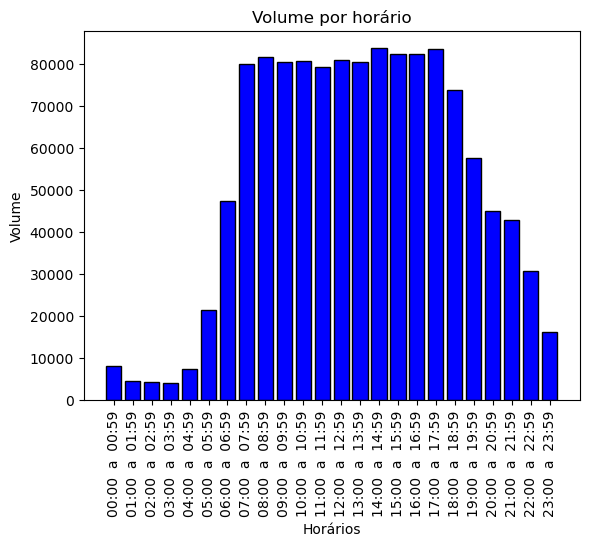

In [5]:
df_aux=df[df["dia_semana"]<5][(df["DATA"]<datetime(2024, 1, 1))| (df["DATA"]>datetime(2024, 11, 1))].groupby('HORA')['VOLUME'].sum()
df2=pd.DataFrame()
df2["HORA"]=pd.DataFrame(pd.DataFrame(df_aux).index)
df2["VOLUME"]=pd.DataFrame(pd.DataFrame(df_aux).values.tolist())
plt.bar(pd.DataFrame(df_aux).index, df_aux, color='blue', edgecolor='black')
plt.title('Volume por horário')
plt.xlabel('Horários')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.show()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_19352\1366835180.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_aux=df[df["dia_semana"]<5][df["DATA"]<datetime(2023, 12, 1)][df["DATA"]>datetime(2023, 11, 1)].groupby('DATA')['VOLUME'].sum()
C:\Users\Marcos\AppData\Local\Temp\ipykernel_19352\1366835180.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_aux=df[df["dia_semana"]<5][df["DATA"]<datetime(2023, 12, 1)][df["DATA"]>datetime(2023, 11, 1)].groupby('DATA')['VOLUME'].sum()


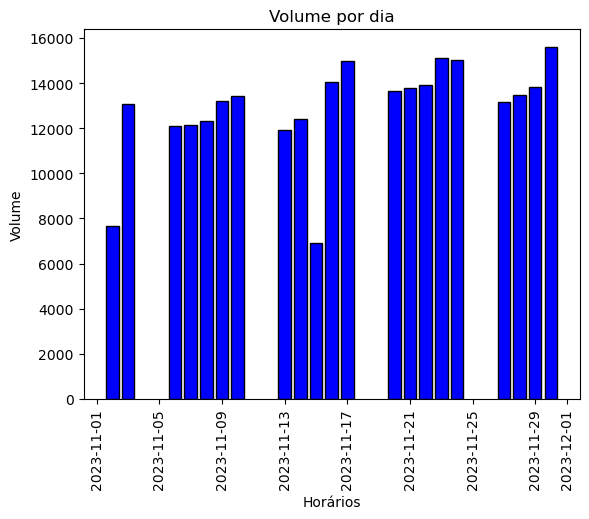

In [6]:
df_aux=df[df["dia_semana"]<5][df["DATA"]<datetime(2023, 12, 1)][df["DATA"]>datetime(2023, 11, 1)].groupby('DATA')['VOLUME'].sum()
df2=pd.DataFrame()
df2["DATA"]=pd.DataFrame(pd.DataFrame(df_aux).index)
df2["VOLUME"]=pd.DataFrame(pd.DataFrame(df_aux).values.tolist())
df2=df2[df2["VOLUME"]>0]
        
plt.bar(pd.DataFrame(df_aux).index, df_aux, color='blue', edgecolor='black')
plt.title('Volume por dia')
plt.xlabel('Horários')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.show()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_19352\3908773148.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_aux=df[df["dia_semana"]<5][df["DATA"]<datetime(2024, 12, 1)][df["DATA"]>datetime(2024, 11, 1)].groupby('DATA')['VOLUME'].sum()
C:\Users\Marcos\AppData\Local\Temp\ipykernel_19352\3908773148.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_aux=df[df["dia_semana"]<5][df["DATA"]<datetime(2024, 12, 1)][df["DATA"]>datetime(2024, 11, 1)].groupby('DATA')['VOLUME'].sum()


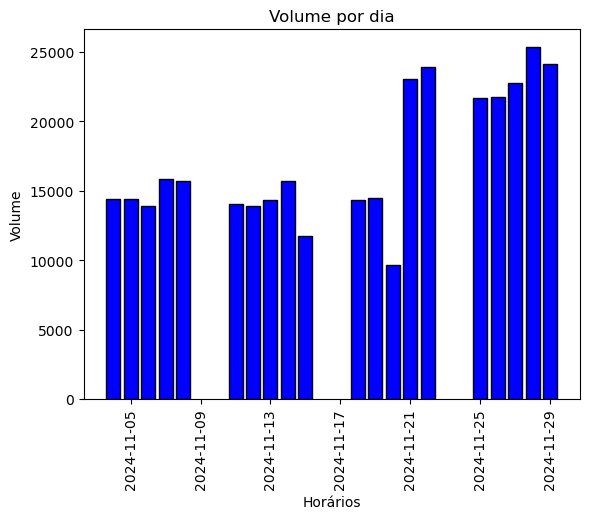

In [7]:
df_aux=df[df["dia_semana"]<5][df["DATA"]<datetime(2024, 12, 1)][df["DATA"]>datetime(2024, 11, 1)].groupby('DATA')['VOLUME'].sum()
df2=pd.DataFrame()
df2["DATA"]=pd.DataFrame(pd.DataFrame(df_aux).index)
df2["VOLUME"]=pd.DataFrame(pd.DataFrame(df_aux).values.tolist())
df2=df2[df2["VOLUME"]>0]
        
plt.bar(pd.DataFrame(df_aux).index, df_aux, color='blue', edgecolor='black')
plt.title('Volume por dia')
plt.xlabel('Horários')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.show()

horarios 7 as 7:59, 12 as 12:59 e 17 as 17:59

C:\Users\Marcos\AppData\Local\Temp\ipykernel_19352\1641965702.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


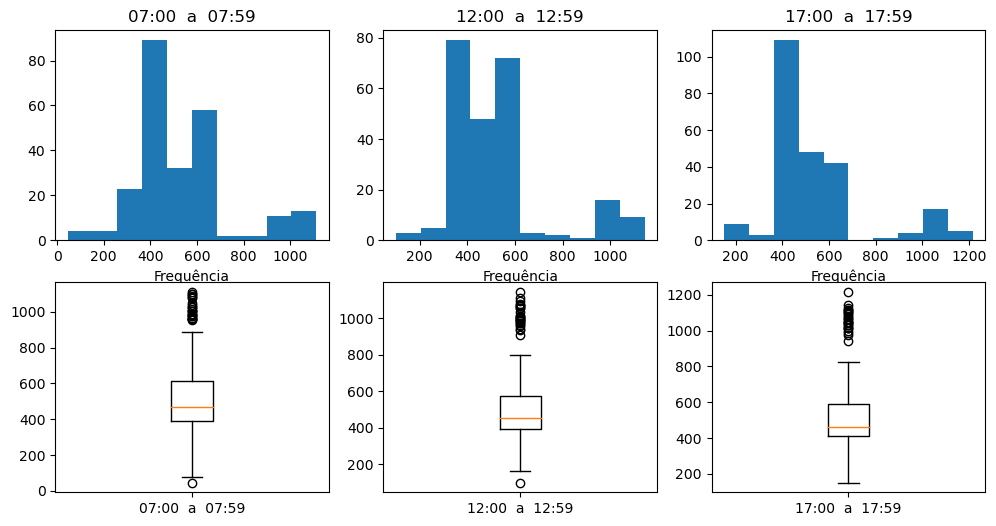

In [8]:
fig = plt.figure(figsize=(12, 6)) 
# plt.figure(figsize=(12, 6)) 
hora='07:00  a  07:59'
axes1 = fig.add_subplot(2, 3, 1)
axes1.hist(df['VOLUME'][df["HORA"]==hora][df["dia_semana"]<5])
axes1.set_title(hora)
axes1.set_xlabel("Frequência")

axes3 = fig.add_subplot(2, 3, 4)
axes3.boxplot(df['VOLUME'][df["HORA"]==hora][df["dia_semana"]<5], labels = [hora])
                
hora='12:00  a  12:59'
axes1 = fig.add_subplot(2, 3, 2)
axes1.hist(df['VOLUME'][df["HORA"]==hora][df["dia_semana"]<5])
axes1.set_title(hora)

axes1.set_xlabel("Frequência")
axes3 = fig.add_subplot(2, 3, 5)
axes3.boxplot(df['VOLUME'][df["HORA"]==hora][df["dia_semana"]<5], labels = [hora])


hora='17:00  a  17:59'
axes1 = fig.add_subplot(2, 3, 3)
axes1.hist(df['VOLUME'][df["HORA"]==hora][df["dia_semana"]<5])
axes1.set_title(hora)
axes1.set_xlabel("Frequência")

axes3 = fig.add_subplot(2, 3, 6)
axes3.boxplot(df['VOLUME'][df["HORA"]==hora][df["dia_semana"]<5], labels = [hora])

fig.show()

In [9]:
def grafico(calculado, confidence_level,degrees_of_freedom,bilateral=True,legenda='Distribuição t-Student com Regiões Críticas'):
    
    # Calculando o t crítico
    alpha = 1 - confidence_level
    if bilateral:
        t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)
    else:
        t_critical = t.ppf(1-alpha , degrees_of_freedom)

    # Criando valores para a distribuição t
    x = np.linspace(-4, 4, 500)  # Intervalo de valores t
    y = t.pdf(x, degrees_of_freedom)  # Função densidade de probabilidade da t-Student

    # Plot da distribuição
    plt.figure()
    plt.plot(x, y, label=f'Distribuição t-Student (df={round(degrees_of_freedom,2)})', color='blue')

    # Destacando as regiões críticas
    if bilateral:
        x_critical_left = np.linspace(-4, -t_critical, 200)
        plt.fill_between(x_critical_left, 0, t.pdf(x_critical_left, degrees_of_freedom), color='red', alpha=0.5)
        plt.axvline(-t_critical, color='red', linestyle='--')
    x_critical_right = np.linspace(t_critical, 4, 200)
    plt.fill_between(x_critical_right, 0, t.pdf(x_critical_right, degrees_of_freedom), color='red', alpha=0.5,label='Região Crítica')
    plt.axvline(t_critical, color='red', linestyle='--', label=f'T crítico ({t_critical:.2f})')
    # Linhas verticais para os t críticos
    plt.axvline(calculado, color='black', linestyle='-', label=f'T calculado({calculado:.2f})')
    


    plt.title(legenda, fontsize=9)
    
    plt.xlabel('Valores de t', fontsize=8)
    plt.ylabel('Densidade de Probabilidade', fontsize=8)
    plt.legend(loc='upper left')
    plt.grid(alpha=0.3)
    plt.ylim(bottom=0)

    plt.show()
# grafico(1.5,0.95,10)

avaliando se as duas duas primeiras semanas de novembro de 2023 é igual a duas ultimas e dezembro


0.3629306510980683 07:00  a  07:59


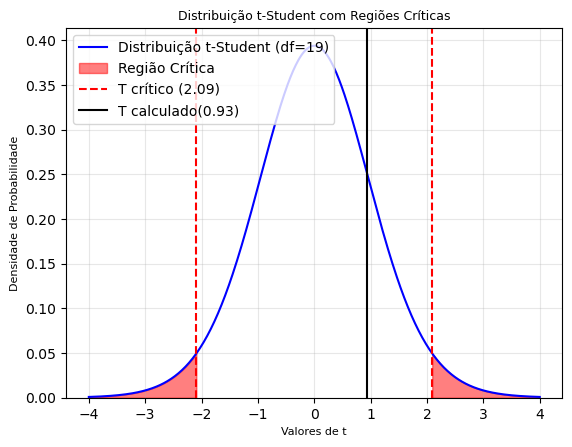

0.1540701710092918 12:00  a  12:59


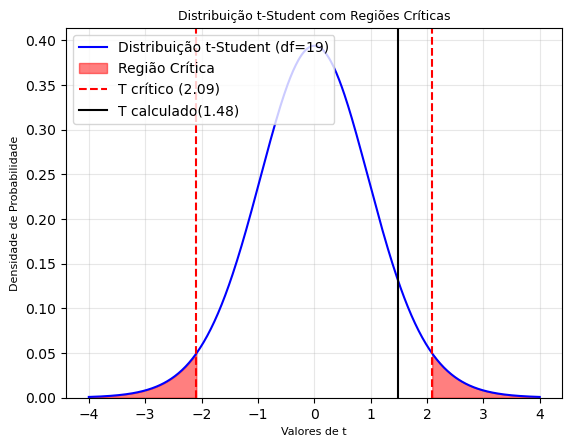

0.1800970851791067 17:00  a  17:59


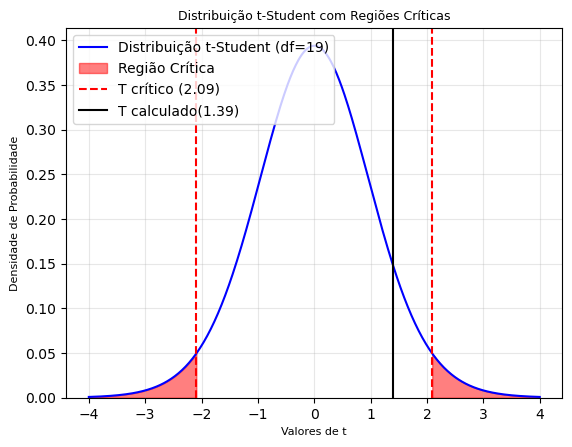

p-valor horario
0.189 - 06:00  a  06:59
0.363 - 07:00  a  07:59
0.197 - 08:00  a  08:59
0.12 - 09:00  a  09:59
0.187 - 10:00  a  10:59
0.133 - 11:00  a  11:59
0.154 - 12:00  a  12:59
0.094 - 13:00  a  13:59
0.212 - 14:00  a  14:59
0.493 - 15:00  a  15:59
0.257 - 16:00  a  16:59
0.18 - 17:00  a  17:59


In [10]:
horas=['07:00  a  07:59','12:00  a  12:59','17:00  a  17:59']

for h in horas:
    df2=df.groupby(['DATA', 'HORA'], as_index=False).agg({'VOLUME': 'sum'})
    a=df2["VOLUME"][df2["DATA"]<=datetime(2024, 11, 20)][df2["DATA"]>=datetime(2024, 11, 1)][df2["HORA"]==h]
    b=df2["VOLUME"][df2["DATA"]<=datetime(2023, 11, 20)][df2["DATA"]>=datetime(2023, 11, 1)][df2["HORA"]==h]
    teste=stats.ttest_rel(a,b)

    print(teste[1],h)
    grafico(teste[0],0.95,teste.df)
print("p-valor","horario")


for h in df["HORA"].unique()[6:18]:
    df2=df.groupby(['DATA', 'HORA'], as_index=False).agg({'VOLUME': 'sum'})
    a=df2["VOLUME"][df2["DATA"]<=datetime(2024, 11, 20)][df2["DATA"]>=datetime(2024, 11, 1)][df2["HORA"]==h]
    b=df2["VOLUME"][df2["DATA"]<=datetime(2023, 11, 20)][df2["DATA"]>=datetime(2023, 11, 1)][df2["HORA"]==h]
    teste=stats.ttest_rel(a,b)

    print(round(teste[1],3),"-",h)


0.03150199532193654 07:00  a  07:59


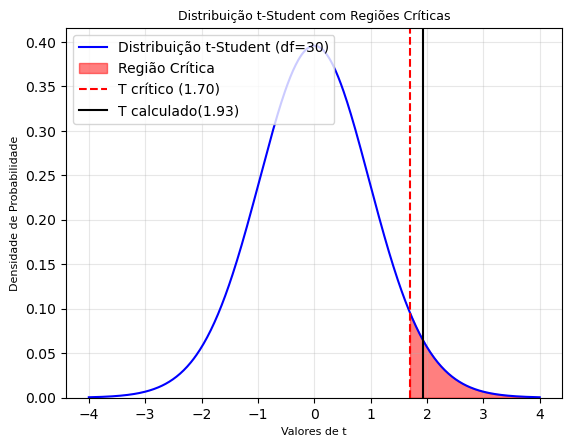

0.02219702838308404 12:00  a  12:59


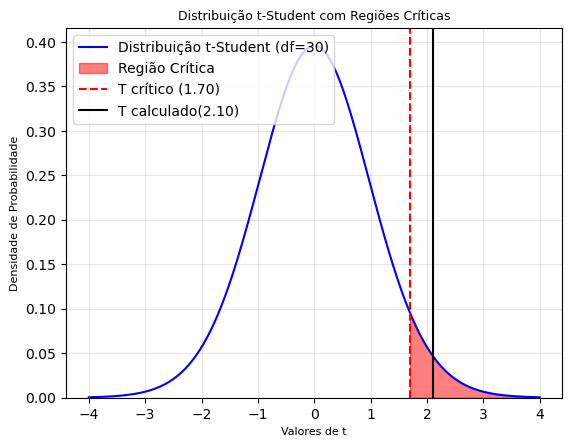

0.007597564490145979 17:00  a  17:59


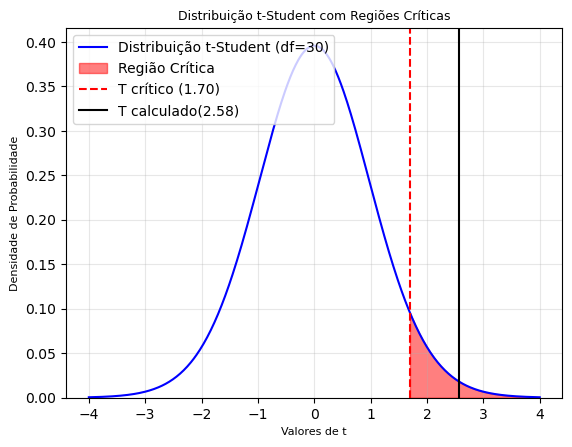

p-valor horario
0.015 - 06:00  a  06:59
0.032 - 07:00  a  07:59
0.011 - 08:00  a  08:59
0.001 - 09:00  a  09:59
0.0 - 10:00  a  10:59
0.001 - 11:00  a  11:59
0.022 - 12:00  a  12:59
0.006 - 13:00  a  13:59
0.007 - 14:00  a  14:59
0.005 - 15:00  a  15:59
0.014 - 16:00  a  16:59
0.008 - 17:00  a  17:59


In [10]:
horas=['07:00  a  07:59','12:00  a  12:59','17:00  a  17:59']

for h in horas:
    df2=df.groupby(['DATA', 'HORA','dia_semana'], as_index=False).agg({'VOLUME': 'sum'})
    a=df2["VOLUME"][df2["DATA"]<=datetime(2024, 12, 31)][df2["DATA"]>=datetime(2024, 12, 1)][df2["HORA"]==h]
    b=df2["VOLUME"][df2["DATA"]<=datetime(2023, 12, 31)][df2["DATA"]>=datetime(2023, 12, 1)][df2["HORA"]==h]
    teste=stats.ttest_rel(a,b, alternative='greater')

    print(teste[1],h)
    grafico(teste[0],0.95,teste.df,bilateral=False)
print("p-valor","horario")


for h in df["HORA"].unique()[6:18]:
    df2=df.groupby(['DATA', 'HORA',"dia_semana"], as_index=False).agg({'VOLUME': 'sum'})
    a=df2["VOLUME"][df2["DATA"]<=datetime(2024, 12,31)][df2["DATA"]>=datetime(2024, 12, 1)][df2["HORA"]==h]
    b=df2["VOLUME"][df2["DATA"]<=datetime(2023, 12, 31)][df2["DATA"]>=datetime(2023, 12, 1)][df2["HORA"]==h]
    teste=stats.ttest_rel(a,b, alternative='greater')

    print(round(teste[1],3),"-",h)
    # if teste[1]>0.05:
    #     print("mantem h0")
    # else:
    #     print("rejeita")


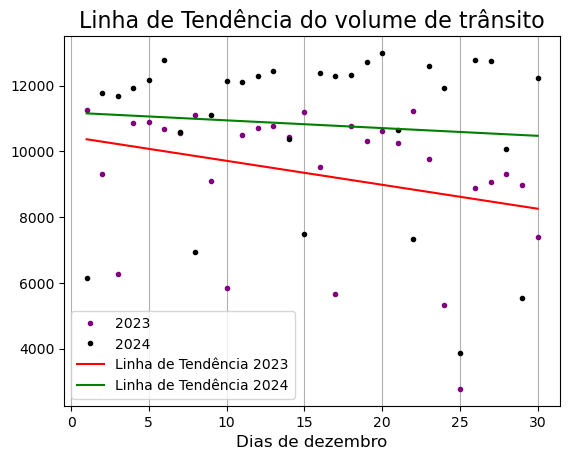

In [13]:
df2= df[df["HORA"].isin(df["HORA"].unique()[6:18])]
x=[]
y2023=[]
y2024=[]
for i in range(1,31):
    x.append(i)
    y2023.append(df2["VOLUME"][df2["DATA"]==datetime(2023, 12, i)].sum())
    y2024.append(df2["VOLUME"][df2["DATA"]==datetime(2024, 12, i)].sum())

plt.plot(x, y2023, color='purple', linestyle='', marker='.', linewidth=2, label="2023")
plt.plot(x, y2024, color='black', linestyle='', marker='.', linewidth=2, label="2024")
coeficientes = np.polyfit(x, y2023, 1)  # Ajusta um polinômio de grau 2
polinomio = np.poly1d(coeficientes)  # Cria a função polinomial

x_tendencia = np.linspace(min(x), max(x), 100)  # Mais pontos para suavizar a linha
y_tendencia = polinomio(x_tendencia)

plt.plot(x_tendencia, y_tendencia, color='red', linestyle='-', label="Linha de Tendência 2023")


coeficientes = np.polyfit(x, y2024, 1)  # Ajusta um polinômio de grau 2
polinomio = np.poly1d(coeficientes)  # Cria a função polinomial

x_tendencia = np.linspace(min(x), max(x), 100)  # Mais pontos para suavizar a linha
y_tendencia = polinomio(x_tendencia)

plt.plot(x_tendencia, y_tendencia, color='green', linestyle='-', label="Linha de Tendência 2024")

plt.title("Linha de Tendência do volume de trânsito", fontsize=16)
plt.xlabel("Dias de dezembro", fontsize=12)

plt.grid(axis='x')
plt.legend()

# Mostrar o gráfico
plt.show()


Correlação

Coeficiente de correlação: 0.10703964237685545


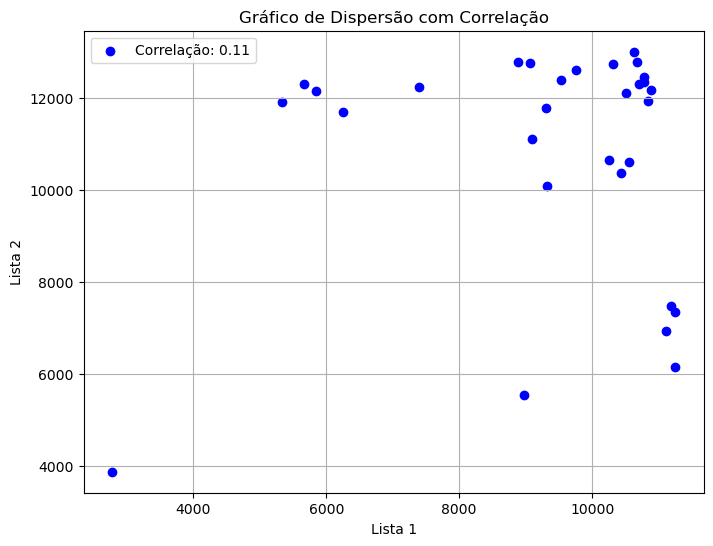

In [16]:
corr = np.corrcoef(y2023, y2024)[0,1]
print(f"Coeficiente de correlação: {corr}")

# Criar um gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y2023, y2024, color='blue', label=f'Correlação: {corr:.2f}')
plt.title('Gráfico de Dispersão com Correlação')
plt.xlabel('Lista 1')
plt.ylabel('Lista 2')
plt.legend()
plt.grid(True)
plt.show()

Outros sinais

In [13]:
df = pd.read_excel("Total_veiculos.xlsx") 

In [70]:
df2=df.groupby(['DATA', 'HORA',"dia_semana","ENDEREÇO"], as_index=False).agg({'VOLUME': 'sum'})
endereço=[]
for e in df["ENDEREÇO"].unique():
    if e not in sinais:
        endereço.append(e)
print('𝑃−Valor', 'Horário', 'indice do semáforo')
for e in endereço:
    for h in horas:
    
        
    
        a=df2["VOLUME"][df2["DATA"]<=datetime(2024, 12,31)][df2["DATA"]>=datetime(2024, 12, 1)][df2["HORA"]==h][df2["ENDEREÇO"]==e]
        b=df2["VOLUME"][df2["DATA"]<=datetime(2023, 12,31)][df2["DATA"]>=datetime(2023, 12, 1)][df2["HORA"]==h][df2["ENDEREÇO"]==e]
        tamanho=min(len(a),len(b))
        teste=stats.ttest_rel(a[0:tamanho],b[0:tamanho], alternative='greater')

        print(round(teste[1],3),"-",h,'-',endereço.index(e)+1)

𝑃−Valor Horário indice do semáforo
0.913 - 07:00  a  07:59 - 1
1.0 - 12:00  a  12:59 - 1
0.967 - 17:00  a  17:59 - 1
nan - 07:00  a  07:59 - 2
nan - 12:00  a  12:59 - 2
nan - 17:00  a  17:59 - 2
0.248 - 07:00  a  07:59 - 3
0.124 - 12:00  a  12:59 - 3
0.273 - 17:00  a  17:59 - 3
0.2 - 07:00  a  07:59 - 4
0.249 - 12:00  a  12:59 - 4
0.482 - 17:00  a  17:59 - 4
1.0 - 07:00  a  07:59 - 5
1.0 - 12:00  a  12:59 - 5
1.0 - 17:00  a  17:59 - 5
0.905 - 07:00  a  07:59 - 6
0.996 - 12:00  a  12:59 - 6
0.951 - 17:00  a  17:59 - 6
0.303 - 07:00  a  07:59 - 7
0.837 - 12:00  a  12:59 - 7
0.68 - 17:00  a  17:59 - 7
0.06 - 07:00  a  07:59 - 8
0.033 - 12:00  a  12:59 - 8
0.018 - 17:00  a  17:59 - 8
0.001 - 07:00  a  07:59 - 9
0.0 - 12:00  a  12:59 - 9
0.0 - 17:00  a  17:59 - 9
1.0 - 07:00  a  07:59 - 10
1.0 - 12:00  a  12:59 - 10
1.0 - 17:00  a  17:59 - 10
0.722 - 07:00  a  07:59 - 11
0.678 - 12:00  a  12:59 - 11
0.631 - 17:00  a  17:59 - 11
0.321 - 07:00  a  07:59 - 12
0.168 - 12:00  a  12:59 - 12
0.386

Média em dezembro de 

2023 e 2024

In [88]:

df2= df[df["ENDEREÇO"].isin(sinais)]
df2= df2[df2["HORA"].isin(df2["HORA"].unique()[6:18])]
x=[]
y2023=[]
y2024=[]
for h in horas:
    for i in range(1,31):
    
        # x.append(i)
        y2023.append(df2["VOLUME"][df2["DATA"]==datetime(2023, 12, i)][df2["HORA"]==h].sum())
        y2024.append(df2["VOLUME"][df2["DATA"]==datetime(2024, 12, i)][df2["HORA"]==h].sum())
print(" media em 2023=",np.mean(y2023),3600/np.mean(y2023))
print(" media em 2024=",np.mean(y2024),3600/np.mean(y2024))
    

 media em 2023= 795.8333333333334 4.523560209424083
 media em 2024= 898.7 4.005786135529098


In [91]:
df3=df2[df2["DATA"]==datetime(2024, 12, i)][df2["HORA"]==h]
df3

C:\Users\Marcos\AppData\Local\Temp\ipykernel_22708\3979304764.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[df2["DATA"]==datetime(2024, 12, i)][df2["HORA"]==h]


,DATA,HORA,ENDEREÇO,dia_semana,nome_dia,VOLUME
8005,2024-12-30,17:00 a 17:59,Rua Djalma Dutra x Rua Quinze de novembro/ 13...,0,segunda,1013


In [17]:
np.corrcoef(y2023, y2024)

array([[1.        , 0.10703964],
       [0.10703964, 1.        ]])

In [67]:
len(df["ENDEREÇO"].unique())

20